# 感知机

### 杜小勤，武汉纺织大学数学与计算机学院，2020年02月05日
https://github.com/duxiaoqin/Lecture-notes-for-Machine-Learning

IRIS(鸢尾花)数据集

由Fisher在1936年整理，包含4个特征:
    Sepal.Length（花萼长度）、Sepal.Width（花萼宽度）、
    Petal.Length（花瓣长度）、Petal.Width（花瓣宽度），
它的特征值都为正浮点数，单位为厘米。
    
目标值为鸢尾花的分类:
- Iris Setosa（山鸢尾）：0；
- Iris Versicolour（杂色鸢尾）：1；
- Iris Virginica（维吉尼亚鸢尾））：2；


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

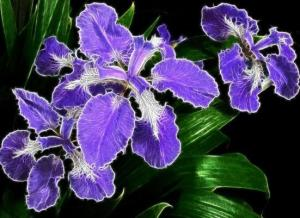

In [2]:
from IPython.display import Image
Image(filename="iris.jpg",width=200, height=100)

载入sklearn鸢尾花数据集

In [3]:
iris = load_iris()
print(iris.keys()) #数据集对象的属性
print(iris.data.shape) #维度信息
print(iris.feature_names) #特征名称
print(iris['target_names']) #分类名称
print(iris['target']) #分类值

dict_keys(['feature_names', 'data', 'target_names', 'DESCR', 'target'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


将数据存入DataFrame中

In [4]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


添加分类属性

In [5]:
iris_df['label'] = iris.target
iris_df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
print(iris_df['label'].value_counts()) #显示不同分类的详细数值

2    50
1    50
0    50
Name: label, dtype: int64


显示2分类数据集（为便于可视化，只选取前2列数据，即花萼长度与宽度属性数据，并且只选取前100条记录，即0与1分类）

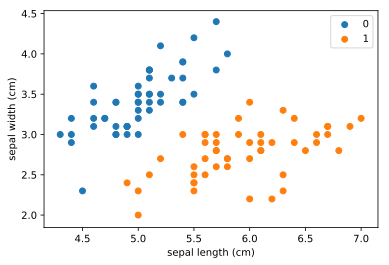

In [7]:
plt.scatter(iris_df[:50]['sepal length (cm)'], iris_df[:50]['sepal width (cm)'], label='0')
plt.scatter(iris_df[50:100]['sepal length (cm)'], iris_df[50:100]['sepal width (cm)'], label='1')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.savefig('PERCEPTRON_OUTPUT1.pdf', bbox_inches='tight')

提取训练数据

In [8]:
data = np.array(iris_df.iloc[:100, [0, 1, -1]]) #取出第0列、第1列、最后一列，前100条记录
X, Y = data[:, :-1], data[:, -1]
Y = np.array([1 if y == 0 else -1 for y in Y]) #转换成适合感知机训练的分类：1、-1
print(data.shape)

(100, 3)


定义感知机模型

In [9]:
class Perceptron:
    def __init__(self):
        self.alpha = 0.05
        self.paras =[]
        
    def w_x_b(self, x):
        return np.dot(self.W, x) + self.b
        
    #随机梯度下降
    def fit(self, X, Y):
        self.W = np.ones(X.shape[1], dtype = np.float32)
        self.b = -5
        
        x0_mean = np.mean(X[0])
        x1_mean = np.mean(X[1])
        self.W[0] = x1_mean/x0_mean
        print(self.W, self.b)
        self.paras = [(self.W, self.b)]
        
        finish = False
        while not finish:
            finish = True
            for index in range(len(X)):
                x = X[index]
                y = Y[index]
                if y * self.w_x_b(x) <= 0:
                    self.W = self.W + self.alpha * y * x #注意，不能使用+=运算符；否则，计算错误
                    self.b = self.b + self.alpha * y
                    finish = False
                    
                    self.paras.append((self.W, self.b))
                    
            if finish:
                return 'Perceptron training completed!'

使用训练数据集训练感知机

In [10]:
np.random.seed()
model = Perceptron()
model.fit(X, Y)

[ 0.91860467  1.        ] -5


'Perceptron training completed!'

绘制训练动画

<IPython.core.display.Javascript object>


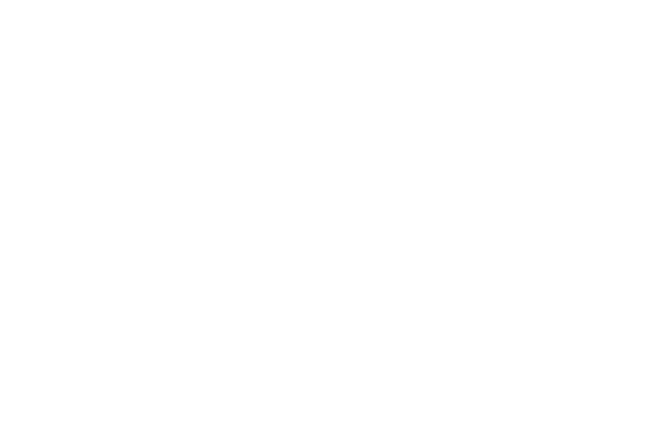

<IPython.core.display.Javascript object>


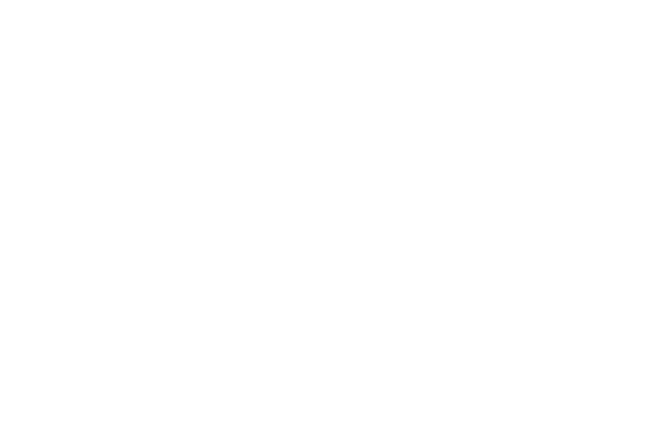

In [11]:
import matplotlib.animation as animation
from IPython.display import HTML
#动画播放，如果是%matplotlib inline，则会嵌入图片
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(3, 7), ylim=(2, 5))

ax.plot(data[:50, 0], data[:50, 1], '+', label='0')
ax.plot(data[50:100, 0], data[50:100, 1], '.', label='1')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title('Perceptron')
ax.legend(loc = 'upper left')

line, = ax.plot([], [], lw = 2)
def update(para):
    W = para[0]
    b = para[1]
    
    X_points = np.linspace(4, 7,10)
    Y_points = -(W[0] * X_points + b)/W[1]
    line.set_data(X_points, Y_points)
ani = animation.FuncAnimation(fig, update, model.paras)
#视频播放
#安装FFMPEG库
#在anaconda环境下，需要执行“conda install -c conda-forge ffmpeg”
#需要FFMPEG.exe，直接下载BUILD，解压到目录，例如E:\ffmpeg\bin
#然后在环境变量PATH中添加“E:\ffmpeg\bin”，路径名称需要根据实际情况做相应的调整
HTML(ani.to_html5_video())

In [12]:
ani.save('Fitting-duxiaoqin.mp4')

绘制训练结果

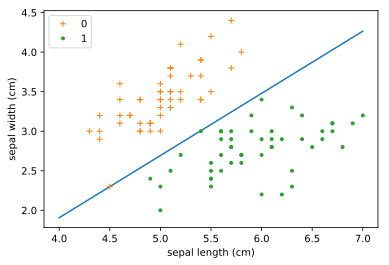

In [13]:
%matplotlib inline
X_points = np.linspace(4, 7,10)
Y_points = -(model.W[0] * X_points + model.b)/model.W[1]
plt.plot(X_points, Y_points)

plt.plot(data[:50, 0], data[:50, 1], '+', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], '.', label='1')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.savefig('PERCEPTRON_OUTPUT2.pdf', bbox_inches='tight')

Perceptron（sklearn）实验

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
model = Perceptron(max_iter = 1000)
model.fit(X, Y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

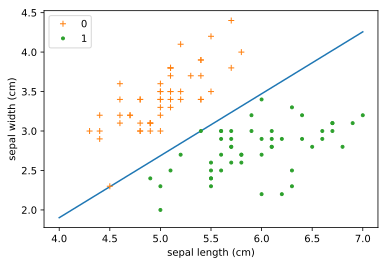

In [16]:
X_points = np.linspace(4, 7,10)
Y_points = -(model.coef_[0][0] * X_points + model.intercept_)/model.coef_[0][1]
plt.plot(X_points, Y_points)

plt.plot(data[:50, 0], data[:50, 1], '+', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], '.', label='1')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.savefig('PERCEPTRON_OUTPUT3.pdf', bbox_inches='tight')

参考文献：
- https://github.com/wzyonggege/statistical-learning-method;
- 《统计学习方法》第2版，李航；
- 《机器学习》课程系列讲义，杜小勤，Chapter2-CN.pdf；